In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

df = pd.read_csv('filtered_data.csv')

print("Moderate to Severe Chronic Kidney Disease")
pb_mtskd_r, pb_mtskd_p = stats.pointbiserialr(df['moderate.to.severe.chronic.kidney.disease'], df['death'])
print("Point biserial correlation coefficient:", pb_mtskd_r)
print("Point biserial p-value:", pb_mtskd_p)
print("")

print("Creatinine")
pb_creat_r, pb_creat_p = stats.pointbiserialr(df['creatinine.enzymatic.method'], df['death'])
print("Point biserial correlation coefficient:", pb_creat_r)
print("Point biserial p-value:", pb_creat_p)
print("")


print("Sodium")
pb_sodium_r, pb_sodium_p = stats.pointbiserialr(df['sodium'], df['death'])
print("Point biserial correlation coefficient:", pb_sodium_r)
print("Point biserial p-value:", pb_sodium_p)
print("")

print("LVEF")
pb_LVEF_r, pb_LVEF_p = stats.pointbiserialr(df['LVEF'], df['death'])
print("Point biserial correlation coefficient:", pb_LVEF_r)
print("Point biserial p-value:", pb_LVEF_p)
print("")

#Shapiro-Wilke
#really just use for continuous, if with binary then split between death and not death
#should I be analyzing abnormal, normal?
shapiro_mtskd_stat, shapiro_mtskd_p = shapiro(df['moderate.to.severe.chronic.kidney.disease'])
shapiro_creatinine_stat, shapiro_creatinine_p = shapiro(df['creatinine.enzymatic.method'])
shapiro_sodium_stat, shapiro_sodium_p = shapiro(df['sodium'])
shapiro_LVEF_stat, shapiro_LVEF_p = shapiro(df['LVEF'])

print("Shapiro moderate to severe kidney disease", shapiro_mtskd_stat)
print("Shapiro creatinine", shapiro_creatinine_stat)
print("Shapiro sodium", shapiro_sodium_stat)
print("Shapiro LVEF", shapiro_LVEF_stat)



Moderate to Severe Chronic Kidney Disease
Point biserial correlation coefficient: 0.08265466522104156
Point biserial p-value: 0.03948292133374911

Creatinine
Point biserial correlation coefficient: 0.1625946338084019
Point biserial p-value: 4.685337762256057e-05

Sodium
Point biserial correlation coefficient: -0.061249781594191394
Point biserial p-value: 0.1273356255684055

LVEF
Point biserial correlation coefficient: 0.003745810545143887
Point biserial p-value: 0.9257785348431581

Shapiro moderate to severe kidney disease 0.5192300003601306
Shapiro creatinine 0.5791254632823876
Shapiro sodium 0.9372556059539947
Shapiro LVEF 0.9893074164382417


Analysis on results?
p-value < 0.05 is statistically significant

Kidney Disease: positive correlation (w/ death)

Creatinine: positive correlation

Sodium: negative correlation, p-value indicates it is not statistically significant

LVEF: slight positive correlation, very much not statistically significant

Overall: Kidney disease and creatinine levels should be used


Shapiro?

Testing if normally dist:

If stat ~ 1, likely normally distributed. See that with sodium and LVEF... doesn't really mean much. Can use tests that assume normal distribution with them.


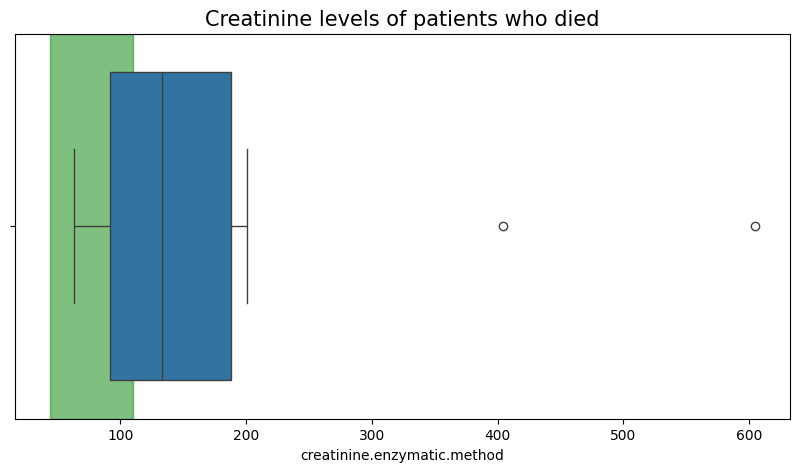

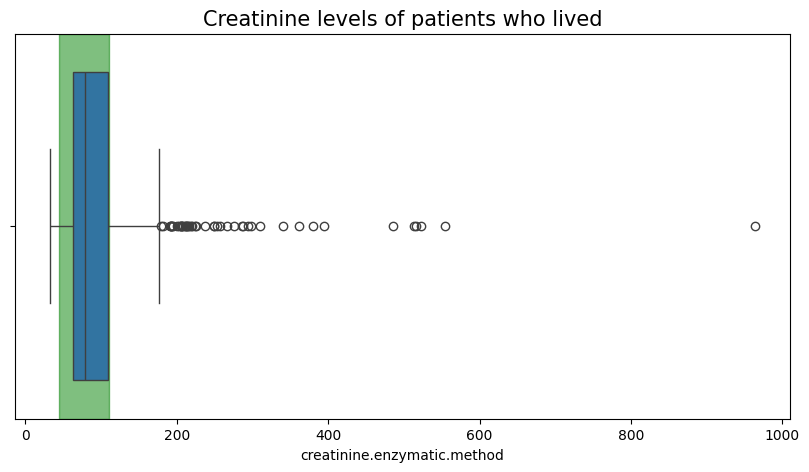

In [ ]:
#plots
import seaborn as sns

creatinine_d = df[df['death']==1]['creatinine.enzymatic.method']
creatinine_l = df[df['death']==0]['creatinine.enzymatic.method']

fig = plt.figure(figsize=(10,5))
sns.boxplot(creatinine_d, orient="h")
plt.title('Creatinine levels of patients who died', fontsize=15)
plt.axvspan(44, 110, color='green', alpha=0.5)
plt.show()

fig = plt.figure(figsize=(10,5))
sns.boxplot(creatinine_l, orient="h")
plt.title('Creatinine levels of patients who lived', fontsize=15)
plt.axvspan(44, 110, color='green', alpha=0.5)
plt.show()


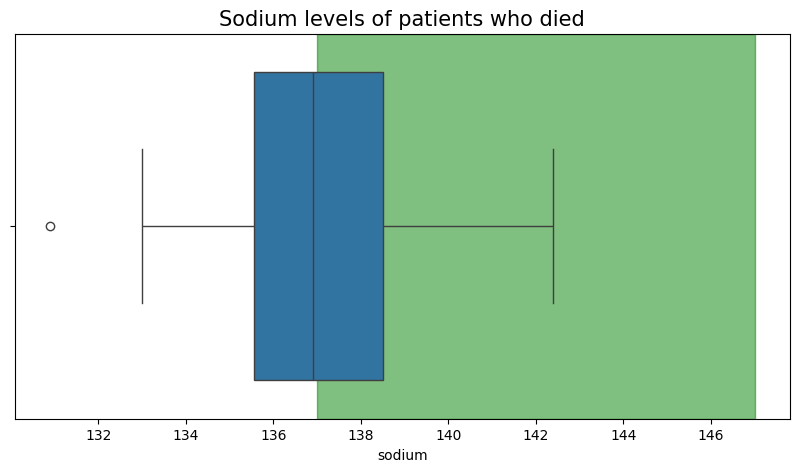

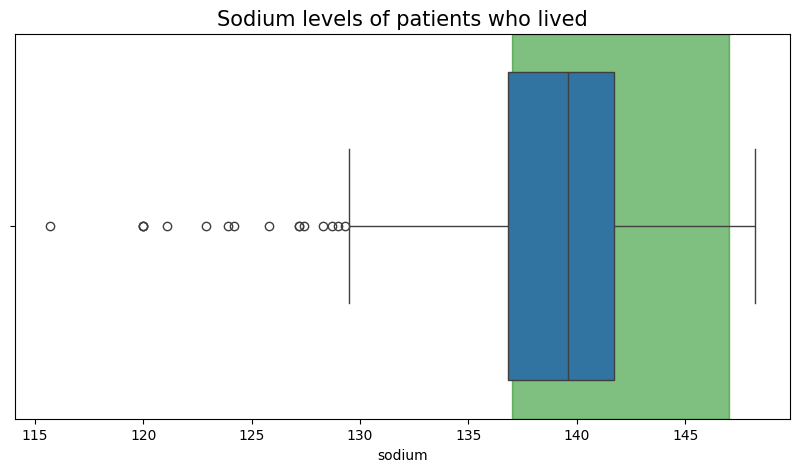

In [ ]:
sod_d = df[df['death']==1]['sodium']
sod_l = df[df['death']==0]['sodium']

fig = plt.figure(figsize=(10,5))
sns.boxplot(sod_d, orient="h")
plt.title('Sodium levels of patients who died', fontsize=15)
plt.axvspan(137, 147, color='green', alpha=0.5)
plt.show()

fig = plt.figure(figsize=(10,5))
sns.boxplot(sod_l, orient="h")
plt.title('Sodium levels of patients who lived', fontsize=15)
plt.axvspan(137, 147, color='green', alpha=0.5)
plt.show()


Green = normal levels

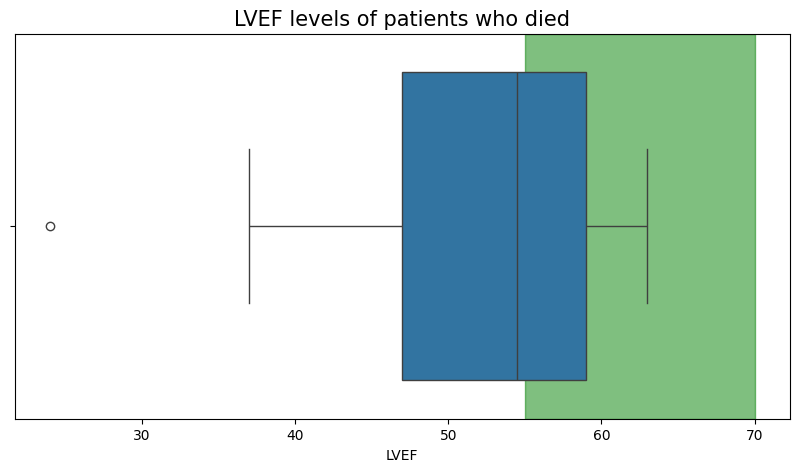

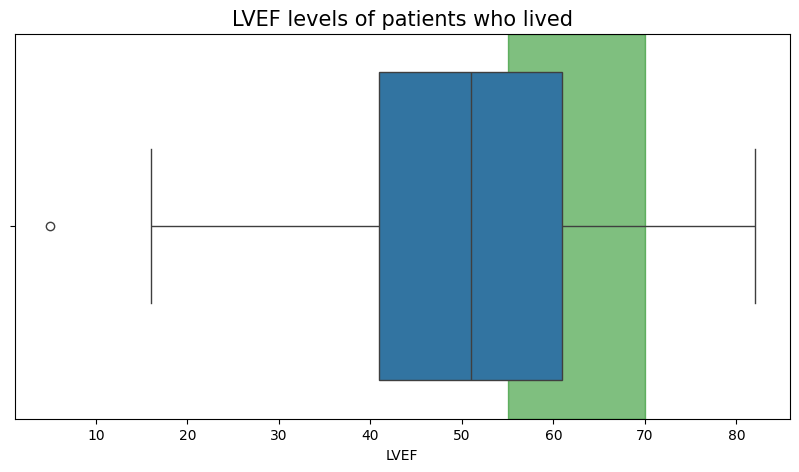

In [21]:
LVEF_d = df[df['death']==1]['LVEF']
LVEF_l = df[df['death']==0]['LVEF']

fig = plt.figure(figsize=(10,5))
sns.boxplot(LVEF_d, orient="h")
plt.title('LVEF levels of patients who died', fontsize=15)
plt.axvspan(55, 70, color='green', alpha=0.5)
plt.show()

fig = plt.figure(figsize=(10,5))
sns.boxplot(LVEF_l, orient="h")
plt.title('LVEF levels of patients who lived', fontsize=15)
plt.axvspan(55, 70, color='green', alpha=0.5)
plt.show()